In [8]:
# Import necessary libraries
import numpy as np
from typing import List

In [9]:
# Define the environment for the reinforcement learning problem
class Sample_Environment:
    """A sample environment that provides observations, actions, and rewards."""
    
    def __init__(self):
        """Initialize the environment, setting the number of steps available."""
        self.steps_left = 20

    def get_observation(self)-> List[float]:
        """Return the current observation of the environment. In this case, it's a fixed list."""
        return [0.0, 0.0, 0.0]
    
    def get_actions(self) -> List[int]:
        """Return the list of possible actions the agent can take."""
        return [0, 1]
    
    def is_done(self) -> bool:
        """Check if the episode is finished (i.e., no steps are left)."""
        return self.steps_left == 0
    
    def action(self, action: int) -> float:
        """ 
        Performs an action in the environment.
        Returns a random reward regardless of the action taken.
        """
        if self.is_done():
            raise ValueError("Cannot take action, environment is done.")
        self.steps_left -= 1
        return np.random.rand()

In [10]:
# Define the agent that interacts with the environment
class Sample_Agent:
    """A sample agent that takes random actions in the environment."""
    
    def __init__(self):
        """Initialize the agent and set the total_reward to 0."""
        self.total_reward = 0.0

    def step(self, env: Sample_Environment):
        """
        Take a single step in the environment.
        The agent gets the current observation and available actions, 
        chooses an action randomly, and collects the reward.
        """
        current_observation = env.get_observation()
        actions = env.get_actions()
        # Choose a random action from the list of available actions.
        reward = env.action(np.random.choice(actions))
        self.total_reward += reward


In [11]:
# Main execution block
if __name__ == "__main__":
    # Create instances of the environment and the agent
    env = Sample_Environment()
    agent = Sample_Agent()

    # Loop until the environment signals that it's done
    while not env.is_done():
        # The agent takes a step in the environment
        agent.step(env)
        
    # Print the total reward collected by the agent
    print(f"Total reward collected: {agent.total_reward: .3f}")
    print("Environment is done.")

Total reward collected:  10.055
Environment is done.


In [2]:
import gymnasium as gym
env = gym.make("CartPole-v1")
obs, info = env.reset()
obs, info

(array([0.02791194, 0.04834921, 0.04127705, 0.01171807], dtype=float32), {})

In [3]:
env.action_space

Discrete(2)

In [4]:
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

In [5]:
env.step(1)

(array([ 0.02887893,  0.24285562,  0.04151141, -0.26766104], dtype=float32),
 1.0,
 False,
 False,
 {})

In [6]:
env.step(0)

(array([0.03373604, 0.04716659, 0.03615819, 0.0378205 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [7]:
env.action_space.sample()  # Take a random action

np.int64(1)

In [ ]:
env.action_space.sample()  

np.int64(0)

In [11]:
env.observation_space.sample()

array([-3.4572866 , -0.6179386 , -0.10923515, -0.55597115], dtype=float32)

In [6]:
import gymnasium as gym
"""A random agent that interacts with the CartPole environment."""
env = gym.make("CartPole-v1", render_mode="human") # Create the environment
total_reward = 0.0 
total_steps = 0
obs, info = env.reset()

In [9]:
while True:
    env.render()  # Render the environment
    action = env.action_space.sample()  # Take a random action
    obs, reward, terminated, truncated, info = env.step(action) # Execute the action
    total_reward += reward
    total_steps += 1
    if terminated: # Check if the episode is done
        break
print(f"Total reward: {total_reward}, Total steps: {total_steps}") 

Total reward: 32.0, Total steps: 34


In [3]:
import gymnasium as gym
gym.make("HalfCheetah-v4")

<TimeLimit<OrderEnforcing<PassiveEnvChecker<HalfCheetahEnv<HalfCheetah-v4>>>>>

In [1]:
# random_mujoco_agent.py
import gymnasium as gym
import numpy as np
from gymnasium.wrappers import RecordEpisodeStatistics
import time

ENV_ID = "HalfCheetah-v4"   # change to Ant-v4, Hopper-v4, Walker2d-v4, etc.
NUM_EPISODES = 5
MAX_STEPS = 1000
SEED = 42

def run_random_agent():
    # create env. set render_mode="human" if you want to see a window (requires a display)
    env = gym.make(ENV_ID, render_mode="human")   # None => no rendering; use "human" or "rgb_array" if set up
    #env = RecordEpisodeStatistics(env)
    obs, info = env.reset(seed=SEED)

    for ep in range(NUM_EPISODES):
        obs, info = env.reset(seed=SEED + ep)
        total_reward = 0.0
        for t in range(MAX_STEPS):
            env.render()
            # sample random action from action space
            action = env.action_space.sample()

            # step the env
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += float(reward)

            # optional: render to a window (only works if render_mode was set to "human")
            # env.render()

            if terminated or truncated:
                break

        print(f"Episode {ep+1:02d} — length={t+1}, total_reward={total_reward:.3f}")

    env.close()

if __name__ == "__main__":
    run_random_agent()


c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\gymnasium\envs\registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Episode 01 — length=1000, total_reward=-182.143
Episode 02 — length=1000, total_reward=-271.506
Episode 03 — length=1000, total_reward=-285.212
Episode 04 — length=1000, total_reward=-375.975
Episode 05 — length=1000, total_reward=-202.475


In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
gym.register_envs(ale_py)

# Create the Atari environment Breakout.
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")

# Wrap the environment to record a video.
# The video will be saved in a "videos" folder.
env = RecordVideo(env, video_folder="./videos")

# The following line is needed to start the recording.
# The reset method returns the initial observation.
obs, info = env.reset()

# Run the environment for a total of 1000 steps.
for _ in range(1000):
    # Take a random action from the environment's action space.
    action = env.action_space.sample()

    # The step method returns the next observation, the reward, whether the episode is terminated or truncated, and additional info.
    obs, reward, terminated, truncated, info = env.step(action)

    # If the episode is over, reset the environment.
    if terminated or truncated:
        obs, info = env.reset()

# Close the environment.
env.close()

print("Video of the random agent has been saved in the 'videos' folder.")

c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\gymnasium\wrappers\rendering.py:296: UserWarning: WARN: Overwriting existing videos at c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Video of the random agent has been saved in the 'videos' folder.


In [2]:
import gymnasium as gym
import random

In [3]:
class RandomActionWrapper(gym.ActionWrapper):
    """A wrapper that takes random actions with a probability of epsilon."""
    
    def __init__(self, env: gym.Env, epsilon: float = 0.2):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action):
        """Override the action method to take random actions with probability epsilon."""
        if random.random() < self.epsilon:
            action = self.env.action_space.sample()  # Take a random action
            print(f"Random action: {action}")
            return action
        else:
            print(f"Original action: {action}")
            return action  # Otherwise, return the original action
        

In [ ]:
if __name__ == "__main__":
    # Create the CartPole environment
    env = RandomActionWrapper(gym.make("CartPole-v1"))
    obs = env.reset()
    total_reward = 0.0
    while True:
        obs, reward, terminated, truncated, info = env.step(0) # Take action 0
        total_reward += reward
        if terminated or truncated:
            break
    print(f"Total reward: {total_reward}")

Original action: 0
Original action: 0
Random action: 1
Original action: 0
Original action: 0
Random action: 1
Original action: 0
Original action: 0
Original action: 0
Original action: 0
Original action: 0
Original action: 0
Total reward: 12.0


In [2]:
import gymnasium as gym


if __name__ == "__main__":
    env = gym.make("Ant-v5", render_mode="rgb_array")
    #env = gym.wrappers.HumanRendering(env)
    env = gym.wrappers.RecordVideo(env, video_folder="video")

    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    print(f"Episode done in {total_steps} steps, total reward {total_reward:.2f}")
    env.close()

Episode done in 104 steps, total reward -19.88


In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the Ant-v5 environment with the render_mode set to "rgb_array" for video recording
env = gym.make("Ant-v5", render_mode="rgb_array")

# Wrap the environment with the RecordVideo wrapper to save the video
# The video will be saved in a "videos_ant" directory
env = RecordVideo(env, video_folder="videos_ant")

# Reset the environment to get the initial observation
observation, info = env.reset()

# Initialize total reward for the episode and episode counter
total_reward = 0
episode_count = 1

# Run the simulation for a total of 2000 steps
for i in range(2000):
    # The render method is called by the RecordVideo wrapper, so you don't need to call it manually.
    # Taking a random action from the environment's action space
    action = env.action_space.sample()

    # Take a step in the environment with the random action
    observation, reward, terminated, truncated, info = env.step(action)

    # Add the reward from the step to the total reward for the current episode
    total_reward += reward

    # If the episode is terminated or truncated (e.g., the ant falls over or the time limit is reached),
    # print the total reward for the episode and reset the environment to start a new one.
    if terminated or truncated:
        print(f"Episode {episode_count} finished with a total reward of: {total_reward:.2f}")
        observation, info = env.reset()
        # Reset the total reward for the next episode
        total_reward = 0
        episode_count += 1

# Close the environment to clean up resources
env.close()

print("\nVideo recording complete. Check the 'videos_ant' directory.")

Episode 1 finished with a total reward of: 4.97
Episode 2 finished with a total reward of: -96.68
Episode 3 finished with a total reward of: -2.28
Episode 4 finished with a total reward of: 8.83
Episode 5 finished with a total reward of: -32.11
Episode 6 finished with a total reward of: -38.17
Episode 7 finished with a total reward of: 22.00
Episode 8 finished with a total reward of: -54.13
Episode 9 finished with a total reward of: -33.40
Episode 10 finished with a total reward of: 6.52
Episode 11 finished with a total reward of: -23.65

Video recording complete. Check the 'videos_ant' directory.


In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the HalfCheetah-v5 environment with the render_mode set to "rgb_array" for video recording
env = gym.make("HalfCheetah-v5", render_mode="rgb_array")

# Wrap the environment with the RecordVideo wrapper to save the video
# The video will be saved in a "videos_cheetah" directory
env = RecordVideo(env, video_folder="videos_cheetah")

# Reset the environment to get the initial observation
observation, info = env.reset()

# Initialize total reward for the episode and episode counter
total_reward = 0
episode_count = 1

# Run the simulation for a total of 2000 steps
for i in range(2000):
    # The render method is called by the RecordVideo wrapper, so you don't need to call it manually.
    # Taking a random action from the environment's action space
    action = env.action_space.sample()

    # Take a step in the environment with the random action
    observation, reward, terminated, truncated, info = env.step(action)

    # Add the reward from the step to the total reward for the current episode
    total_reward += reward

    # If the episode is terminated or truncated (e.g., the ant falls over or the time limit is reached),
    # print the total reward for the episode and reset the environment to start a new one.
    if terminated or truncated:
        print(f"Episode {episode_count} finished with a total reward of: {total_reward:.2f}")
        observation, info = env.reset()
        # Reset the total reward for the next episode
        total_reward = 0
        episode_count += 1

# Close the environment to clean up resources
env.close()

print("\nVideo recording complete. Check the 'videos_cheetah' directory.")

Episode 1 finished with a total reward of: -195.79
Episode 2 finished with a total reward of: -232.35

Video recording complete. Check the 'videos_cheetah' directory.


In [ ]:
# A random agent on the FrozenLake environment
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the FrozsenLake environment with the render_mode set to "rgb_array" for video recording
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

# Wrap the environment with the RecordVideo wrapper to save the video
# The video will be saved in a "videos_FrozenLake" directory
env = RecordVideo(env, video_folder="videos_FrozenLake")

# Reset the environment to get the initial observation
observation, info = env.reset()

# Initialize total reward for the episode and episode counter
total_reward = 0
episode_count = 1

# Run the simulation for a total of 2000 steps
for i in range(2000):
    # The render method is called by the RecordVideo wrapper, so you don't need to call it manually.
    # Taking a random action from the environment's action space
    action = env.action_space.sample()

    # Take a step in the environment with the random action
    observation, reward, terminated, truncated, info = env.step(action)

    # Add the reward from the step to the total reward for the current episode
    total_reward += reward

    # If the episode is terminated or truncated,
    # print the total reward for the episode and reset the environment to start a new one.
    if terminated or truncated:
        print(f"Episode {episode_count} finished with a total reward of: {total_reward:.2f}")
        observation, info = env.reset()
        # Reset the total reward for the next episode
        total_reward = 0
        episode_count += 1

# Close the environment to clean up resources
env.close()

print("\nVideo recording complete. Check the 'videos_FrozenLake' directory.")

Episode 1 finished with a total reward of: 0.00
Episode 2 finished with a total reward of: 0.00
Episode 3 finished with a total reward of: 0.00
Episode 4 finished with a total reward of: 0.00
Episode 5 finished with a total reward of: 0.00
Episode 6 finished with a total reward of: 0.00
Episode 7 finished with a total reward of: 0.00
Episode 8 finished with a total reward of: 0.00
Episode 9 finished with a total reward of: 0.00
Episode 10 finished with a total reward of: 0.00
Episode 11 finished with a total reward of: 0.00
Episode 12 finished with a total reward of: 0.00
Episode 13 finished with a total reward of: 0.00
Episode 14 finished with a total reward of: 0.00
Episode 15 finished with a total reward of: 0.00
Episode 16 finished with a total reward of: 0.00
Episode 17 finished with a total reward of: 0.00
Episode 18 finished with a total reward of: 0.00
Episode 19 finished with a total reward of: 0.00
Episode 20 finished with a total reward of: 0.00
Episode 21 finished with a to

In [6]:
import gymnasium as gym
import numpy as np
e = gym.make("FrozenLake-v1", render_mode="ansi")
e.observation_space, e.action_space

(Discrete(16), Discrete(4))

In [7]:
e.reset()

(0, {'prob': 1})

In [10]:
e.observation_space = gym.spaces.Box(low=0, high=1, shape=(16,), dtype=np.float32)
e.observation_space.low

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [11]:
e.observation_space.high

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [1]:
import gymnasium as gym
from stable_baselines3 import A2C
from gymnasium.wrappers import RecordVideo

In [ ]:
def train(environment: gym.Env, total_timesteps: int):
    """Function to train an A2C agent on a specified environment for a given number of timesteps."""
    env = gym.make(environment, render_mode=None)
    model = A2C("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=total_timesteps)
    model.save("CartPole_A2C")

In [ ]:
def test():
    """Function to test a trained A2C agent on the CartPole environment and record a video."""
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    env = RecordVideo(env, video_folder="videos_CartPole_A2c")
    obs, info = env.reset()
    model = A2C.load("CartPole_A2C")

    total_reward = 0
    episode_over = False
    
    while not episode_over:
        action, state = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        episode_over = terminated or truncated
    print(f"total reward: {total_reward:.2f}")
    env.close()


In [10]:
train(environment="CartPole-v1", total_timesteps=100000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 38.6     |
|    ep_rew_mean        | 38.6     |
| time/                 |          |
|    fps                | 529      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.661   |
|    explained_variance | -0.311   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.69     |
|    value_loss         | 9.18     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 39.2     |
|    ep_rew_mean        | 39.2     |
| time/                 |          |
|    fps                | 562      |
|    iterations         | 200      |
|    time_elapsed

In [5]:
test()

c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\gymnasium\wrappers\rendering.py:296: UserWarning: WARN: Overwriting existing videos at c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_CartPole_A2c folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


total reward: 500.00


In [1]:
import numpy as np

# --- Environment and Policy Definition ---

# States: 0, 1, 2, 3 (Goal)
num_states = 4

# Actions: 0 for 'left', 1 for 'right'
num_actions = 2

# Discount factor
gamma = 0.9

# Let's assume we have the value function from a previous iteration
# V(s=0)=-0.6, V(s=1)=-0.2, V(s=2)=0.4, V(s=3)=1 (Goal)
# These are arbitrary but plausible values for demonstration.
# The value of the terminal state is its reward.
V = np.array([-0.6, -0.2, 0.4, 1.0])

# Stochastic Policy, pi(action | state): 50% chance for each action
# pi[state, action] = probability
policy = np.full((num_states, num_actions), 0.5)

# --- Bellman Equation Calculation for State 1 ---

# The state we want to calculate the value for
current_state = 1
value_of_current_state = 0.0

# Sum over all possible actions ('left', 'right')
for action in [0, 1]:  # 0: left, 1: right
    # Get the probability of taking this action under the policy
    action_prob = policy[current_state, action]

    # --- Now, calculate the expected value for taking this action ---
    # This involves summing over all possible outcomes (next states)
    # In our "windy" environment, intending to go 'right' has a 50% chance of
    # actually going left and 50% chance of going right.

    expected_value_for_action = 0.0

    # Define the stochastic transitions for our windy gridworld
    # P(next_state | current_state, action)
    # In this specific example, the outcome is independent of the chosen action
    transitions = {
        'left': {'next_state': 0, 'prob': 0.5, 'reward': 0},
        'right': {'next_state': 2, 'prob': 0.5, 'reward': 0}
    }

    # Sum over all possible next states
    for outcome in transitions.values():
        next_state = outcome['next_state']
        transition_prob = outcome['prob']
        reward = outcome['reward']

        # Core of the Bellman equation: r + gamma * V(s')
        q_value = reward + gamma * V[next_state]
        expected_value_for_action += transition_prob * q_value

    # Weight the expected value of the action by the probability of taking it
    value_of_current_state += action_prob * expected_value_for_action

print(f"Current Value Function: {V}")
print(f"Calculated Value of State {current_state} (V(s=1)): {value_of_current_state:.4f}")

Current Value Function: [-0.6 -0.2  0.4  1. ]
Calculated Value of State 1 (V(s=1)): -0.0900


In [ ]:
import gymnasium as gym
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
from gymnasium.wrappers import RecordVideo
import numpy as np
#import ale_py
#gym.register_envs(ale_py)

In [4]:
def train(environment: gym.Env, total_timesteps: int):
    """Function to train an A2C agent on a specified environment for a given number of timesteps."""
    vec_env = make_atari_env(environment, n_envs=4, seed=0)
    vec_env = VecFrameStack(vec_env, n_stack=4)
    model = A2C("CnnPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=total_timesteps)
    model.save("Pong_A2C")

In [5]:
train(environment="PongNoFrameskip-v4", total_timesteps=400000)

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 585      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.75    |
|    explained_variance | 0.0472   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0491   |
|    value_loss         | 0.000964 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 3.36e+03  |
|    ep_rew_mean        | -20.7     |
| time/                 |           |
|    fps                | 639       |
|    iterations         | 200       |
|    time_elapsed       | 6         |
|    total_timesteps    | 4000      |
| train/                |           |
|    entropy_loss       | -1.75     |
|    

KeyboardInterrupt: 

In [45]:
def test_and_record_pong():
    """
    Function to test a trained A2C agent on the Pong environment
    and record a video of the gameplay.
    """
    # Create the environment. It's recommended to use n_envs=1 for a clean video recording of one episode.
    vec_env = make_atari_env("PongNoFrameskip-v4", n_envs=1, seed=42)
    vec_env = VecFrameStack(vec_env, n_stack=4)

    # Define a function that triggers video recording.
    # This will record the first episode (from step 0 to the end of the episode).
    def video_trigger(step):
        return step == 0

    # Wrap the environment with the video recorder
    vec_env = VecVideoRecorder(
        vec_env,
        video_folder="videos_Pong_a2c",  # The folder to save the video in
        record_video_trigger=video_trigger,
        video_length=20000,  # A sufficiently long length to capture the whole episode
        name_prefix="a2c-pong-agent" # A prefix for the video file name
    )

    # Load the trained agent
    model = A2C.load("Pong_A2C")

    # Reset the environment and get the initial observation
    obs = vec_env.reset()

    # Create an array to hold the rewards for each environment
    rewards_per_env = np.zeros(vec_env.num_envs)
    
    # Create a flag to track when all environments are done
    all_done = False
    
    while not all_done:
        # Use the model to predict the action; deterministic=True for evaluation
        action, _states = model.predict(obs, deterministic=True)
        
        # Take a step in the environment
        obs, reward, terminated, info = vec_env.step(action)
        
        # Add the reward to the corresponding environment's total
        rewards_per_env += reward
        
        # Check if all parallel environments have finished
        if np.all(terminated):
            all_done = True

    # Print the mean reward
    print(f"Mean reward: {np.mean(rewards_per_env):.2f}")
    
    # Close the environment
    vec_env.close()


In [50]:
test_and_record_pong()

Mean reward: -21.00
MoviePy - Building video c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_Pong_a2c\a2c-pong-agent-step-0-to-step-20000.mp4.
MoviePy - Writing video c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_Pong_a2c\a2c-pong-agent-step-0-to-step-20000.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_Pong_a2c\a2c-pong-agent-step-0-to-step-20000.mp4


In [51]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

import ale_py

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
vec_env = make_atari_env("PongNoFrameskip-v4", n_envs=4, seed=0)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(vec_env, n_stack=4)

model = A2C("CnnPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25_000)

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render("human")

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 539      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.75    |
|    explained_variance | 0.0536   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0535   |
|    value_loss         | 0.00114  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 3.44e+03 |
|    ep_rew_mean        | -20.5    |
| time/                 |          |
|    fps                | 567      |
|    iterations         | 200      |
|    time_elapsed       | 7        |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -1.73    |
|    explained_v

KeyboardInterrupt: 

In [1]:
import numpy as np

def bellman_optimality_update(state, mdp, V):
    """
    Calculates the optimal value of a state using the Bellman optimality equation.

    Args:
        state: The current state.
        mdp: A dictionary representing the Markov Decision Process with:
             - mdp['T']: A dictionary for transition probabilities,
                         mdp['T'][state][action] = [(prob, next_state), ...]
             - mdp['R']: A dictionary for rewards,
                         mdp['R'][state][action][next_state] = reward
             - mdp['actions']: A list of all possible actions.
             - mdp['gamma']: The discount factor.
        V: A dictionary mapping states to their current value estimates.

    Returns:
        The updated optimal value for the given state.
    """
    if state not in mdp['T']:  # Terminal state
        return 0

    action_values = []
    for action in mdp['actions']:
        expected_value = 0
        if action in mdp['T'][state]:
            for prob, next_state in mdp['T'][state][action]:
                reward = mdp['R'].get(state, {}).get(action, {}).get(next_state, 0)
                expected_value += prob * (reward + mdp['gamma'] * V.get(next_state, 0))
        action_values.append(expected_value)

    return np.max(action_values)

if __name__ == '__main__':
    # Example Usage: A simple grid world
    # States are represented by coordinates (row, col)
    # Actions are 'up', 'down', 'left', 'right'

    mdp = {
        'states': [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)],
        'actions': ['up', 'down', 'left', 'right'],
        'T': {
            (0, 0): {'right': [(1.0, (0, 1))]},
            (0, 1): {'left': [(1.0, (0, 0))], 'right': [(1.0, (0, 2))]},
            (1, 0): {'up': [(1.0, (0, 0))], 'right': [(1.0, (1, 1))]},
            (1, 1): {'left': [(1.0, (1, 0))], 'right': [(1.0, (1, 2))], 'up': [(1.0, (0, 1))]}
        },
        'R': {
            (0, 1): {'right': {(0, 2): 10}}, # Reward for reaching the goal
            (1, 1): {'right': {(1, 2): -10}} # Negative reward for hitting a penalty state
        },
        'gamma': 0.9
    }

    # Initial value estimates for all states
    V = {state: 0 for state in mdp['states']}

    # Calculate the optimal value for state (0, 1)
    optimal_value_0_1 = bellman_optimality_update((0, 1), mdp, V)
    print(f"Optimal value for state (0, 1): {optimal_value_0_1}")

    # To find the true optimal values for all states, this update would be
    # iterated until the values converge (Value Iteration).
    for _ in range(100):
        new_V = {}
        for state in mdp['states']:
            new_V[state] = bellman_optimality_update(state, mdp, V)
        V = new_V

    print("\nOptimal values after several iterations:")
    for state, value in V.items():
        print(f"V*({state}): {value:.2f}")

Optimal value for state (0, 1): 10.0

Optimal values after several iterations:
V*((0, 0)): 9.00
V*((0, 1)): 10.00
V*((0, 2)): 0.00
V*((1, 0)): 8.10
V*((1, 1)): 9.00
V*((1, 2)): 0.00


In [7]:
import gymnasium as gym

# Initialise the environment
env = gym.make("BipedalWalker-v3", render_mode="human")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):
    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [4]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

In [12]:
def train(environment: gym.Env, total_timesteps: int):
    """Function to train an A2C agent on a specified environment for a given number of timesteps."""
    env = gym.make(environment,is_slippery=False, render_mode="rgb_array")
    model = DQN("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=total_timesteps)
    model.save("frozenlake_dqn")

In [19]:
train("FrozenLake-v1", total_timesteps=50000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 20486    |
|    time_elapsed     | 0        |
|    total_timesteps  | 23       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.38     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11152    |
|    time_elapsed     | 0        |
|    total_timesteps  | 59       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.75     |
|    ep_rew_mean      | 0     

In [ ]:
def test_dqn_and_record_video(model_path: str, env_name: str = "FrozenLake-v1", video_length: int = 500):
    """
    Tests a trained DQN agent on a specified environment for one episode
    and records a video of the episode.

    Args:
        model_path (str): The path to the trained DQN model.
        env_name (str): The name of the environment to test on.
        video_length (int): The maximum number of timesteps to record for the video.
    """
    # Create the environment for testing
    eval_env = gym.make(env_name,is_slippery=False, render_mode="rgb_array")
    
    # Wrap the environment for video recording
    # DummyVecEnv is used here because VecVideoRecorder expects a vectorized environment
    eval_env = DummyVecEnv([lambda: eval_env]) 
    
    video_folder = "videos_FrozenLake_dqn"
    video_recorder = VecVideoRecorder(
        eval_env, video_folder, 
        record_video_trigger=lambda x: x == 0,
        video_length=video_length,
        name_prefix=f"dqn-frozenlake-test"
    )

    # Load the trained model
    model = DQN.load(model_path, env=video_recorder)

    print("Starting video recording...")
    obs = video_recorder.reset()
    done = False
    episode_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = video_recorder.step(action)
        episode_reward += reward[0]
        if done:
            break

    video_recorder.close()
    print(f"Video recorded to: {video_folder}")
    print(f"Episode Reward: {episode_reward}")

In [21]:
test_dqn_and_record_video(model_path="frozenlake_dqn")

Starting video recording...
MoviePy - Building video c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_FrozenLake_dqn\dqn-frozenlake-test-step-0-to-step-500.mp4.
MoviePy - Writing video c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_FrozenLake_dqn\dqn-frozenlake-test-step-0-to-step-500.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_FrozenLake_dqn\dqn-frozenlake-test-step-0-to-step-500.mp4
Video recorded to: videos_FrozenLake_dqn
Episode Reward: 1.0


## DQN on CartPole

In [11]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

env = gym.make("CartPole-v1")
from gymnasium.wrappers import RecordVideo

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)


# To ensure reproducibility during training, you can fix the random seeds
# by uncommenting the lines below. This makes the results consistent across
# runs, which is helpful for debugging or comparing different approaches.
#
# That said, allowing randomness can be beneficial in practice, as it lets
# the model explore different training trajectories.


# seed = 42
# random.seed(seed)
# torch.manual_seed(seed)
# env.reset(seed=seed)
# env.action_space.seed(seed)
# env.observation_space.seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)

In [2]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [3]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [4]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer

BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.01
EPS_DECAY = 2500
TAU = 0.005
LR = 3e-4


# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1).indices.view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [5]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

Complete


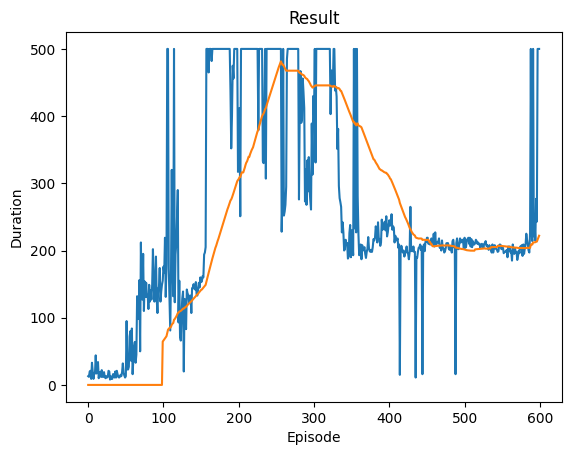

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
if torch.cuda.is_available() or torch.backends.mps.is_available():
    num_episodes = 600
else:
    num_episodes = 50

for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

In [13]:
num_test_episodes = 5 # How many episodes to run for testing
total_rewards = []
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="videos_cartpole-dqn_agent",    # Folder to save videos
    name_prefix="eval",               # Prefix for video filenames
    episode_trigger=lambda x: True    # Record every episode
)

for episode in range(num_test_episodes):
    obs, info = env.reset()
    episode_reward = 0
    done = False
    truncated = False

    while not done and not truncated:
        # Convert observation to a PyTorch tensor
        obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)

        # Get Q-values from the model
        with torch.no_grad(): # No need to calculate gradients during testing
            q_values = policy_net(obs_tensor.to(device))

        # Select the action with the highest Q-value (greedy action)
        action = torch.argmax(q_values).item()

        # Take the action in the environment
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward

        env.render() # This will display the environment

    total_rewards.append(episode_reward)
    print(f"Episode {episode + 1} finished with reward: {episode_reward}")

env.close()

# Calculate average reward
average_reward = sum(total_rewards) / num_test_episodes
print(f"\nAverage reward over {num_test_episodes} test episodes: {average_reward}")

Episode 1 finished with reward: 500.0
Episode 2 finished with reward: 500.0
Episode 3 finished with reward: 500.0
Episode 4 finished with reward: 500.0
Episode 5 finished with reward: 500.0

Average reward over 5 test episodes: 500.0


In [1]:
# A random agent on the InvertedPendulam environment
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the InvertedPendulam environment with the render_mode set to "rgb_array" for video recording
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")

# Wrap the environment with the RecordVideo wrapper to save the video
# The video will be saved in a "videos_IPendulum" directory
env = RecordVideo(env, video_folder="videos_IPendulum")

# Reset the environment to get the initial observation
observation, info = env.reset()

# Initialize total reward for the episode and episode counter
total_reward = 0
episode_count = 1

# Run the simulation for a total of 2000 steps
for i in range(2000):
    # The render method is called by the RecordVideo wrapper, so you don't need to call it manually.
    # Taking a random action from the environment's action space
    action = env.action_space.sample()

    # Take a step in the environment with the random action
    observation, reward, terminated, truncated, info = env.step(action)

    # Add the reward from the step to the total reward for the current episode
    total_reward += reward

    # If the episode is terminated or truncated,
    # print the total reward for the episode and reset the environment to start a new one.
    if terminated or truncated:
        print(f"Episode {episode_count} finished with a total reward of: {total_reward:.2f}")
        observation, info = env.reset()
        # Reset the total reward for the next episode
        total_reward = 0
        episode_count += 1

# Close the environment to clean up resources
env.close()

print("\nVideo recording complete. Check the 'videos_IPendulum' directory.")

c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\gymnasium\envs\registration.py:512: DeprecationWarning: WARN: The environment InvertedPendulum-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Episode 1 finished with a total reward of: 3.00
Episode 2 finished with a total reward of: 6.00
Episode 3 finished with a total reward of: 6.00
Episode 4 finished with a total reward of: 7.00
Episode 5 finished with a total reward of: 8.00
Episode 6 finished with a total reward of: 3.00
Episode 7 finished with a total reward of: 3.00
Episode 8 finished with a total reward of: 5.00
Episode 9 finished with a total reward of: 6.00
Episode 10 finished with a total reward of: 4.00
Episode 11 finished with a total reward of: 5.00
Episode 12 finished with a total reward of: 5.00
Episode 13 finished with a total reward of: 4.00
Episode 14 finished with a total reward of: 4.00
Episode 15 finished with a total reward of: 5.00
Episode 16 finished with a total reward of: 6.00
Episode 17 finished with a total reward of: 9.00
Episode 18 finished with a total reward of: 6.00
Episode 19 finished with a total reward of: 12.00
Episode 20 finished with a total reward of: 6.00
Episode 21 finished with a t

## Crossentropy on the FrozenLake environment

In [1]:
import numpy as np
import gymnasium as gym
from dataclasses import dataclass
import typing as tt
import random
from torch.utils.tensorboard.writer import SummaryWriter
import os 

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
HIDDEN_SIZE = 128
BATCH_SIZE = 100
PERCENTILE = 30
GAMMA = 0.9
MODEL_PATH = "frozenlake_crossentropy.pth" 
VIDEO_TEST_FOLDER = "videos_flake_crossentropy" 

In [3]:
class DiscreteOneHotWrapper(gym.ObservationWrapper):
    def __init__(self, env: gym.Env):
        super(DiscreteOneHotWrapper, self).__init__(env)
        assert isinstance(env.observation_space,gym.spaces.Discrete)
        shape = (env.observation_space.n, )
        self.observation_space = gym.spaces.Box(0.0, 1.0, shape, dtype=np.float32)

    def observation(self, observation):
        res = np.copy(self.observation_space.low)
        res[observation] = 1.0
        return res

In [4]:
class Net(nn.Module):
    def __init__(self, obs_size: int, hidden_size: int,
                 n_actions: int):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


In [5]:
@dataclass
class EpisodeStep:
    observation: np.ndarray
    action: int

@dataclass
class Episode:
    reward: float
    steps: tt.List[EpisodeStep]

In [ ]:
def iterate_batches(env: gym.Env, net: Net, batch_size: int) -> \
        tt.Generator[tt.List[Episode], None, None]:
    batch = []
    episode_reward = 0.0
    episode_steps = []
    obs, info = env.reset() 
    sm = nn.Softmax(dim=1)
    while True:
        obs_v = torch.tensor(obs, dtype=torch.float32)
        act_probs_v = sm(net(obs_v.unsqueeze(0)))
        act_probs = act_probs_v.data.numpy()[0]
        action = np.random.choice(len(act_probs), p=act_probs)
        next_obs, reward, is_done, is_trunc, _ = env.step(action)
        episode_reward += float(reward)
        step = EpisodeStep(observation=obs, action=action)
        episode_steps.append(step)
        if is_done or is_trunc:
            e = Episode(reward=episode_reward, steps=episode_steps)
            batch.append(e)
            episode_reward = 0.0
            episode_steps = []
            next_obs, _ = env.reset() 
            if len(batch) == batch_size:
                yield batch
                batch = []
        obs = next_obs



In [8]:
def filter_batch(batch: tt.List[Episode], percentile: float) -> tt.Tuple[tt.List[Episode], tt.List[np.ndarray],tt.List[int], float]:
    reward_fun = lambda s: s.reward * (GAMMA ** len(s.steps))
    disc_rewards = list(map(reward_fun, batch))
    reward_bound = np.percentile(disc_rewards, percentile)

    train_obs: tt.List[np.ndarray] = []
    train_act: tt.List[int] = []
    elite_batch: tt.List[Episode] = []

    for example, discounted_reward in zip(batch, disc_rewards):
        if discounted_reward > reward_bound:
            train_obs.extend(map(lambda step: step.observation,example.steps))
            train_act.extend(map(lambda step: step.action,example.steps))
            elite_batch.append(example)

    return elite_batch, train_obs, train_act, reward_bound

In [ ]:
def test_model_and_record(model: Net, env_name: str, num_test_episodes: int = 5, video_folder: str = VIDEO_TEST_FOLDER):
    print(f"\nTesting model for {num_test_episodes} episodes...")
    os.makedirs(video_folder, exist_ok=True)

    test_env = gym.make(env_name, is_slippery=False, render_mode="rgb_array")
    test_env = DiscreteOneHotWrapper(test_env)
    test_env = gym.wrappers.RecordVideo(
        test_env,
        video_folder=video_folder,
        episode_trigger=lambda episode_id: True,
        name_prefix="test_episode" 
    )

    model.eval() 
    sm = nn.Softmax(dim=1)
    total_rewards = []

    for i in range(num_test_episodes):
        obs, _ = test_env.reset() 
        episode_reward = 0.0
        done = False
        truncated = False
        while not done and not truncated:
            obs_v = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
            act_probs_v = sm(model(obs_v))
            action = torch.argmax(act_probs_v).item() # Choose action with highest probability
            obs, reward, done, truncated, _ = test_env.step(action)
            episode_reward += reward
        total_rewards.append(episode_reward)
        print(f"Test Episode {i+1}: Reward = {episode_reward}")

    test_env.close()
    mean_reward = np.mean(total_rewards)
    print(f"Mean test reward over {num_test_episodes} episodes: {mean_reward:.3f}")
    return mean_reward

In [11]:
if __name__ == "__main__":
    random.seed(12345)
    
    # --- Training Phase ---
    print("Starting training...")
    # Create the environment and wrap it for one-hot encoding
    train_env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
    train_env = DiscreteOneHotWrapper(train_env)
    
    obs_size = train_env.observation_space.shape[0]
    n_actions = train_env.action_space.n

    net = Net(obs_size, HIDDEN_SIZE, n_actions)
    objective = nn.CrossEntropyLoss()
    optimizer = optim.Adam(params=net.parameters(), lr=0.001)
    writer = SummaryWriter(comment="-frozenlake-nonslippery")

    full_batch = []
    # Pass the RecordVideo wrapped environment to iterate_batches
    for iter_no, batch in enumerate(iterate_batches(train_env, net, BATCH_SIZE)):
        reward_mean = float(np.mean(list(map(lambda s: s.reward, batch))))
        full_batch, obs, acts, reward_bound = filter_batch(full_batch + batch, PERCENTILE)
        if not full_batch:
            continue
        obs_v = torch.FloatTensor(np.vstack(obs))
        acts_v = torch.LongTensor(acts)
        full_batch = full_batch[-500:]

        optimizer.zero_grad()
        action_scores_v = net(obs_v)
        loss_v = objective(action_scores_v, acts_v)
        loss_v.backward()
        optimizer.step()
        print("%d: loss=%.3f, rw_mean=%.3f, ""rw_bound=%.3f, batch=%d" % (iter_no, loss_v.item(), reward_mean,reward_bound, len(full_batch)))
        writer.add_scalar("loss", loss_v.item(), iter_no)
        writer.add_scalar("reward_mean", reward_mean, iter_no)
        writer.add_scalar("reward_bound", reward_bound, iter_no)
        if reward_mean > 0.8:
            print("Solved!")
            break
    writer.close()
    train_env.close() 

    # --- Save the trained model ---
    torch.save(net.state_dict(), MODEL_PATH)
    print(f"Trained model saved to {MODEL_PATH}")

Starting training...
0: loss=1.298, rw_mean=0.010, rw_bound=0.000, batch=1
1: loss=1.311, rw_mean=0.010, rw_bound=0.000, batch=2
2: loss=1.316, rw_mean=0.020, rw_bound=0.000, batch=4
3: loss=1.318, rw_mean=0.020, rw_bound=0.000, batch=6
4: loss=1.317, rw_mean=0.010, rw_bound=0.000, batch=7
5: loss=1.311, rw_mean=0.000, rw_bound=0.000, batch=7
6: loss=1.307, rw_mean=0.010, rw_bound=0.000, batch=8
7: loss=1.308, rw_mean=0.060, rw_bound=0.000, batch=14
8: loss=1.307, rw_mean=0.010, rw_bound=0.000, batch=15
9: loss=1.302, rw_mean=0.030, rw_bound=0.000, batch=18
10: loss=1.296, rw_mean=0.050, rw_bound=0.000, batch=23
11: loss=1.289, rw_mean=0.010, rw_bound=0.000, batch=24
12: loss=1.287, rw_mean=0.010, rw_bound=0.000, batch=25
13: loss=1.279, rw_mean=0.010, rw_bound=0.000, batch=26
14: loss=1.276, rw_mean=0.030, rw_bound=0.000, batch=29
15: loss=1.269, rw_mean=0.050, rw_bound=0.000, batch=34
16: loss=1.265, rw_mean=0.020, rw_bound=0.000, batch=36
17: loss=1.259, rw_mean=0.030, rw_bound=0.00

In [14]:
# --- Testing Phase ---
print("\nStarting testing phase...")
# Load the trained model
loaded_net = Net(obs_size, HIDDEN_SIZE, n_actions)
loaded_net.load_state_dict(torch.load(MODEL_PATH))
    
# Test the loaded model and record videos
test_model_and_record(loaded_net, "FrozenLake-v1", num_test_episodes=5, video_folder=VIDEO_TEST_FOLDER)


Starting testing phase...

Testing model for 5 episodes...


c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\.venv\Lib\site-packages\gymnasium\wrappers\rendering.py:296: UserWarning: WARN: Overwriting existing videos at c:\Users\User\Desktop\VS_Code_Projects\Reinforcement_learning\videos_flake_crossentropy folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Test Episode 1: Reward = 1.0
Test Episode 2: Reward = 1.0
Test Episode 3: Reward = 1.0
Test Episode 4: Reward = 1.0
Test Episode 5: Reward = 1.0
Mean test reward over 5 episodes: 1.000


np.float64(1.0)